In [23]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [25]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


In [27]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()

,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
2,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
3,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
4,4.0,1954400510,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
df.dtypes

0
NaN              float64
id                object
date              object
price             object
bedrooms          object
bathrooms         object
sqft_living       object
sqft_lot          object
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above        object
sqft_basement     object
yr_built          object
yr_renovated      object
zipcode           object
lat               object
long              object
sqft_living15     object
sqft_lot15        object
dtype: object

In [30]:
df = df.drop(columns=df.columns[:2])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
3,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
4,20150218T000000,510000.0,3.0,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
print('number of NaN values for the columns bedrooms :', df['bedrooms'].isnull().sum())
print('number of NaN values for the columns bedrooms :', df['bathrooms'].isnull().sum())

number of NaN values for the columns bedrooms : 13
number of NaN values for the columns bedrooms : 10


In [33]:
bed_avg = df['bedrooms'].astype(float).mean(axis=0)
df['bedrooms'].replace(np.nan, bed_avg, inplace=True)
print('number of NaN values for the columns bedrooms :', df['bedrooms'].isnull().sum())

bath_avg = df['bathrooms'].astype(float).mean(axis=0)
df['bathrooms'].replace(np.nan, bath_avg, inplace=True)
print('number of NaN values for the columns bathrooms :', df['bathrooms'].isnull().sum())

number of NaN values for the columns bedrooms : 0
number of NaN values for the columns bathrooms : 0


In [38]:
unique_floor_cnt = df['floors'].value_counts().to_frame()
unique_floor_cnt.columns = ['counts']
unique_floor_cnt.index.name = 'floors'
unique_floor_cnt

,counts
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


## Question 4
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.

<AxesSubplot: xlabel='waterfront', ylabel='price'>

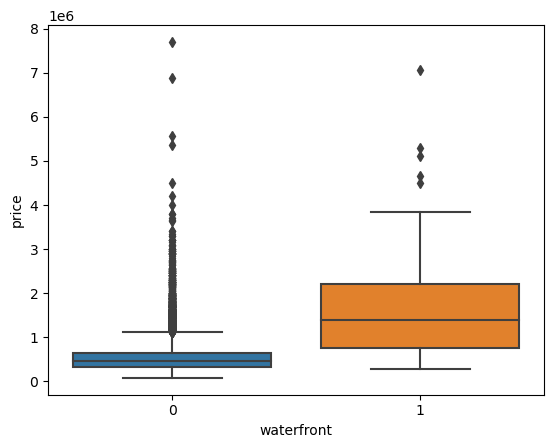

In [42]:
df['price'] =  df['price'].astype(float)
df['waterfront'] = df['waterfront'].astype(int)
sns.boxplot('waterfront', 'price', data=df)

## Question 5
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. You will need to submit the screenshot for the final project.

<AxesSubplot: xlabel='sqft_above', ylabel='price'>

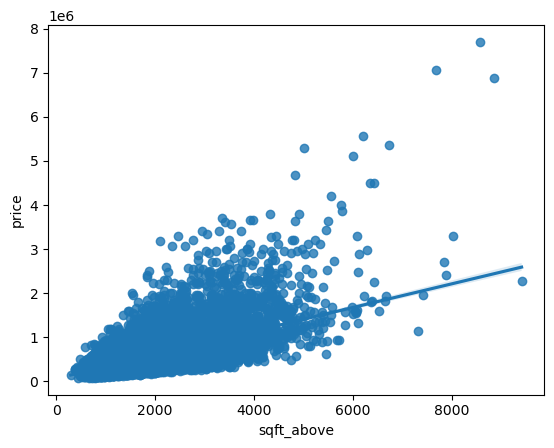

In [44]:
df['sqft_above'] = df['sqft_above'].astype(float)
sns.regplot('sqft_above', 'price', data=df)

In [49]:
df['bedrooms'] = df['bedrooms'].astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)
df['sqft_living'] = df['sqft_living'].astype(float)
df['sqft_lot'] = df['sqft_lot'].astype(float)
df['floors'] = df['floors'].astype(float)
df['view'] = df['view'].astype(int)
df['condition'] = df['condition'].astype(int)
df['grade'] = df['grade'].astype(int)
df['sqft_basement'] = df['sqft_basement'].astype(int)
df['yr_built'] = df['yr_built'].astype(int)
df['yr_renovated'] = df['yr_renovated'].astype(int)
df['zipcode'] = df['zipcode'].astype(int)
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
df['sqft_living15'] = df['sqft_living15'].astype(float)
df['sqft_lot15'] = df['sqft_lot15'].astype(float)

df.corr()['price'].sort_values()

0
zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [59]:
lr = LinearRegression()
X = df['sqft_living'].values.reshape(-1,1)
y = df['price']
lr.fit(X,y)

R2 = lr.score(X,y)
R2

0.4928532179037931

## Question 7
Fit a linear regression model to predict the 'price' using the list of features:

In [60]:
X = df[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]
y = df['price']
lr7 = LinearRegression()
lr7.fit(X,y)
R2_q7 = lr7.score(X,y)
R2_q7

0.657693232939844

## Question 8
Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [61]:
X = df[['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']]
y = df['price']
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X,y)
R2_q8 = pipe.score(X,y)
R2_q8

0.7513409617201561

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=1)
print('number of test samples:', X_test.shape[0])
print('number of training samples:', X_train.shape[0])

number of test samples: 3242
number of training samples: 18371


## Question 9
Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [64]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)
R2_q9 = rr.score(X_test, y_test)
R2_q9

0.6478759163939116

## Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2. You will need to submit it for the final project.


In [66]:
pf = PolynomialFeatures(degree=2)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.fit_transform(X_test)
rr10 = Ridge(alpha=0.1)
rr10.fit(X_train_pf, y_train)
R2_q10 = rr10.score(X_test_pf, y_test)
R2_q10

0.7002744266056676